Цей проект присвячений аналізу даних про ціни на оренду житла та інші показники на сайті Airbnb у Афінах. Для аналізу впливу різних показників на ціну оренди була застосована модель лінійної регресії. Також будуть надані рекомендації для реальних та потенційних орендодавців.

Датасет був взятий з цього сайту:\
https://zenodo.org/records/4446043#.Y9Y9ENJBwUE\
Він містить дані про столицю Греції - Афіни за вихідні дні.

Цей набір даних містить інформацію щодо оренди помешкань на сайті Airbnb в Афінах, включаючи ціну, тип кімнати, статус господаря, зручності та інформацію про місцезнаходження:  

- realSum - повна вартість проживання двох осіб протягом двох ночей в євро.  
- room_type тип орендованого приміщення.  
- room_shared  - чи ділите кімнату з іншими (господар або гості).  
- room_private - чи є кімната повністю у вашому розпорядженні на час оренди.  
- person_capacity - максимальна кількість людей, яку можна розмістити.  
- host_is_superhost - чи визначено орендодавця як супергосподаря на Airbnb.  
- multi - чи пропонує господар кілька кімнат для оренди в одному приміщенні.  
- biz - чи може бути орендовано приміщення для бізнес-зустрічей.  
- cleanliness_rating  - загальна оцінка чистоти приміщення при поселенні.  
- guest_satisfaction_overall - наскільки гості задоволені своїм перебуванням в помешканні.  
- bedrooms -  Загальна кількість спалень, що пропонується для оренди господарем (0 для квартири-студії).  
- dist  - відстань від центру міста.  
- metro_dist - відстань до найближчої станції метро.  
- attr_index_norm -  нормалізований індекс привабливості (0-100) місця розташування помешкання.  
- attr_index_norm - нормалізований індекс привабливості (0-100) закладів харчування (кафе, ресторани і т.д.).  
- lng, lat - географічні координати приміщення, що пропонується для оренди.  

In [1]:
#імпортуємо усі потрібні бібліотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#зчитуємо датасет із файлу csv у датефрейм
data = pd.read_csv('athens_weekends.csv') 

На початку аналізу хочу відмітити, що, судячи з постановки завдання, найкращим та єдиним методом для вирішення поставленої проблеми є, очевидно, лінійна регресія, адже вихідний показник - це число, ціна оренди квартири.

Але перед будь-яким аналізом, потрібно привести усі дані до такого стану, щоб вони для цього аналізу підходили.

## 1. Перевірка датасету та виправлення/видалення пропусків/аномальних показників та загальна підготовка даних.

In [2]:
data

,Unnamed: 0,realSum,room_type,room_shared,room_private,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index,attr_index_norm,rest_index,rest_index_norm,lng,lat
0,0,138.963748,Entire home/apt,False,False,4.0,True,1,0,10.0,96.0,1,0.407278,0.304570,240.306496,9.054205,407.167958,6.080622,23.73168,37.97776
1,1,91.627024,Entire home/apt,False,False,4.0,True,1,0,10.0,99.0,1,4.367463,0.297474,39.802996,1.499687,58.706522,0.876720,23.72712,38.01435
2,2,76.629250,Private room,False,True,2.0,False,0,0,10.0,100.0,1,2.194174,0.385247,78.734001,2.966519,113.326684,1.692414,23.73391,37.99529
3,3,151.852459,Entire home/apt,False,False,4.0,True,0,1,10.0,100.0,2,2.508982,0.563473,68.774881,2.591282,101.162069,1.510748,23.73200,37.99800
4,4,98.657231,Entire home/apt,False,False,2.0,True,1,0,10.0,95.0,1,2.740581,0.725045,62.902859,2.370037,92.611125,1.383049,23.73100,38.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,2622,74.051508,Entire home/apt,False,False,3.0,True,0,0,10.0,98.0,1,3.311976,1.856865,49.097725,1.849891,71.119758,1.062098,23.75000,38.00306
2623,2623,295.737351,Entire home/apt,False,False,4.0,True,0,1,10.0,100.0,1,1.800556,0.571033,146.240703,5.510019,203.884287,3.044796,23.71500,37.97400
2624,2624,169.193635,Entire home/apt,False,False,4.0,True,0,1,10.0,99.0,2,3.845100,0.786416,42.260382,1.592276,60.948754,0.910205,23.76657,37.99986
2625,2625,160.991728,Entire home/apt,False,False,4.0,True,1,0,10.0,100.0,1,4.827460,0.141952,35.700540,1.345116,52.659912,0.786420,23.73300,38.01900


In [3]:
#виводимо інформацію про стовпчики датафрейму
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  2627 non-null   int64  
 1   realSum                     2627 non-null   float64
 2   room_type                   2627 non-null   object 
 3   room_shared                 2627 non-null   bool   
 4   room_private                2627 non-null   bool   
 5   person_capacity             2627 non-null   float64
 6   host_is_superhost           2627 non-null   bool   
 7   multi                       2627 non-null   int64  
 8   biz                         2627 non-null   int64  
 9   cleanliness_rating          2627 non-null   float64
 10  guest_satisfaction_overall  2627 non-null   float64
 11  bedrooms                    2627 non-null   int64  
 12  dist                        2627 non-null   float64
 13  metro_dist                  2627 

Пропущені дані відсутні та усі стовпчики відповідають своєму типу даних.

Для початку видалимо стовпчик "Unnamed: 0", адже ми зможемо скористатись автоматичною індексацією даних.

In [4]:
#видалення стовпчику з оригінального датасету(за допомогою inplace = True) за його назвою 
data.drop(["Unnamed: 0"], axis=1, inplace = True)

Також, для зручності, перекодуємо значення у стовпчику host_is_superhost у 0 та 1. Стовпчики room_shared та room_private видалимо, адже ці стовпчики дублюють значення зі стопчика під назвою room_type та будуть створені саме із цього стовпчика у процесі його перекодування.
Також можна видалити стовпчики attr_index та rest_index, бо в датасеті вже присутні нормалізовані значення цих даних.

In [5]:
data.drop(["room_shared"], axis=1, inplace = True)
data.drop(["room_private"], axis=1, inplace = True)
data.drop(["attr_index"], axis=1, inplace = True)
data.drop(["rest_index"], axis=1, inplace = True)
#за допомогою методу .astype змінюємо тип стовпчика на int, що нам і потрібно
data["host_is_superhost"] = data["host_is_superhost"].astype(int)
data

,realSum,room_type,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat
0,138.963748,Entire home/apt,4.0,1,1,0,10.0,96.0,1,0.407278,0.304570,9.054205,6.080622,23.73168,37.97776
1,91.627024,Entire home/apt,4.0,1,1,0,10.0,99.0,1,4.367463,0.297474,1.499687,0.876720,23.72712,38.01435
2,76.629250,Private room,2.0,0,0,0,10.0,100.0,1,2.194174,0.385247,2.966519,1.692414,23.73391,37.99529
3,151.852459,Entire home/apt,4.0,1,0,1,10.0,100.0,2,2.508982,0.563473,2.591282,1.510748,23.73200,37.99800
4,98.657231,Entire home/apt,2.0,1,1,0,10.0,95.0,1,2.740581,0.725045,2.370037,1.383049,23.73100,38.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,74.051508,Entire home/apt,3.0,1,0,0,10.0,98.0,1,3.311976,1.856865,1.849891,1.062098,23.75000,38.00306
2623,295.737351,Entire home/apt,4.0,1,0,1,10.0,100.0,1,1.800556,0.571033,5.510019,3.044796,23.71500,37.97400
2624,169.193635,Entire home/apt,4.0,1,0,1,10.0,99.0,2,3.845100,0.786416,1.592276,0.910205,23.76657,37.99986
2625,160.991728,Entire home/apt,4.0,1,1,0,10.0,100.0,1,4.827460,0.141952,1.345116,0.786420,23.73300,38.01900


Тепер перевіримо датафрейм на аномалії та викиди:

In [6]:
#виведення описової статистики по датафрейму
data.describe()

,realSum,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat
count,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.00000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000
mean,147.580456,3.690141,0.426342,0.261134,0.381804,9.63190,94.905976,1.264180,1.821674,0.480538,5.626333,3.231077,23.731827,37.981153
std,79.814934,1.283763,0.494639,0.439337,0.485921,0.84905,8.426506,0.646232,0.956845,0.286426,4.515683,2.908393,0.013461,0.013813
min,42.884259,2.000000,0.000000,0.000000,0.000000,2.00000,20.000000,0.000000,0.113560,0.020224,1.040228,0.592757,23.702710,37.953000
25%,98.657231,3.000000,0.000000,0.000000,0.000000,9.00000,93.000000,1.000000,1.136893,0.286208,3.040342,1.716206,23.723135,37.969420
50%,127.715417,4.000000,0.000000,0.000000,0.000000,10.00000,97.000000,1.000000,1.668721,0.419438,4.449542,2.577194,23.729800,37.979480
75%,171.537037,4.000000,1.000000,1.000000,1.000000,10.00000,100.000000,2.000000,2.314173,0.599855,6.449582,3.669073,23.739510,37.989960
max,1043.282638,6.000000,1.000000,1.000000,1.000000,10.00000,100.000000,4.000000,6.222396,1.959657,100.000000,100.000000,23.786020,38.031140


Жодних аномальних даних, що б виходили завстановлені для кожного стовпчика межі, немає

## 2.Розвідковий та візуальний аналіз даних

In [7]:
data.describe()

,realSum,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat
count,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.00000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000,2627.000000
mean,147.580456,3.690141,0.426342,0.261134,0.381804,9.63190,94.905976,1.264180,1.821674,0.480538,5.626333,3.231077,23.731827,37.981153
std,79.814934,1.283763,0.494639,0.439337,0.485921,0.84905,8.426506,0.646232,0.956845,0.286426,4.515683,2.908393,0.013461,0.013813
min,42.884259,2.000000,0.000000,0.000000,0.000000,2.00000,20.000000,0.000000,0.113560,0.020224,1.040228,0.592757,23.702710,37.953000
25%,98.657231,3.000000,0.000000,0.000000,0.000000,9.00000,93.000000,1.000000,1.136893,0.286208,3.040342,1.716206,23.723135,37.969420
50%,127.715417,4.000000,0.000000,0.000000,0.000000,10.00000,97.000000,1.000000,1.668721,0.419438,4.449542,2.577194,23.729800,37.979480
75%,171.537037,4.000000,1.000000,1.000000,1.000000,10.00000,100.000000,2.000000,2.314173,0.599855,6.449582,3.669073,23.739510,37.989960
max,1043.282638,6.000000,1.000000,1.000000,1.000000,10.00000,100.000000,4.000000,6.222396,1.959657,100.000000,100.000000,23.786020,38.031140


Проведемо аналіз середнього та медіани, для оцінки розподілу деяких показників:

**Повна вартість житла:**

Середнє значення становить 147.58  
Медіана(50 процентиль) - 127.7. 
Можна зробити висновок про правосторонню асиметрію у розподілі значень. Це може свідчити про те, що у виборці присутні більш крупні значення, які "тягнуть" середнє значення в правий бік. Це досить очікуваний ефект у випадку з ціанми на житло, бо декілька елітних приміщень з цінами близько 1000$

**Максимальна кількість людей:**

Середнє - 3.69  
Медіана - 4.00  Невеликий зсув середнього до меншого значення, у порівнянні з медіаною, каже про те, що помешкання частіше знімаються для кількості людей, меншої за 4, ніж більшої. 4 є найпопулярнішим варіантом

**Висновки щодо бінарних даних:**

Близько 42% власників житла цієї вибірки є супергосподарями 
Близько 26% власників житла цієї вибірки пропонують кілька кімнат 
Близько 38% приміщень мають можливість проведення бізнес-зустрічей  

**Кількість окремих спалень:**  

Середнє - 1.26  
Медіана - 2.00  
Середнє значення є істотно меншим за медіанне, можна зробити висновок, що найпопулярнішими варіантами є 2 та 1 спальні кімнати, 3-х та 4-х кімнатні помешкання цікаві меншій кількості людей.

**Нормалізоване значення привабливості місця помешкання:**  

Середнє - 5.62  
Медіана - 4.44  
З абсолютних значень видно, що більшість помешкань мають оцінку, мешну за 10% від максимальної (шкала від 0 до 100). Але середнє та медіана досить близькі, що свідчить про всього кілька аномально великих значень та як мінімум одне, що дорівнює 100.

**Нормалізоване значення привабливості закладів харчування:**  

Середнє - 3.23  
Медіана - 2.57  
Ситуація аналогічна до індексу привабливості місцевості - кілька аномально великих значень зсувають середнє до більших значень, але абсолютна більшість навіть не перетинає бар'єр у 10% від всієї шкали.

**Довгота:**  

Середнє - 23.731827  

**Широта:**  

Середнє - 37.981153    

Якщо взяти середні значення координат із описової статистики, то отримана точка знаходиться приблизно у 800 метрах на північний захід від Акрополю, у 500 м від комерційного центру міста, площі Омонія. І хоча цей метод є досить грубим, цю інформацію можна інтерпретувати як те, що місця для проживання туристів(адже Афіни - це, здебільшого, туристичне місто і приміщення здаються в оренду саме для туристів) знаходяться у історичному та комерційному центрі міста.

Погляньмо на форми розподілу деяких показників:

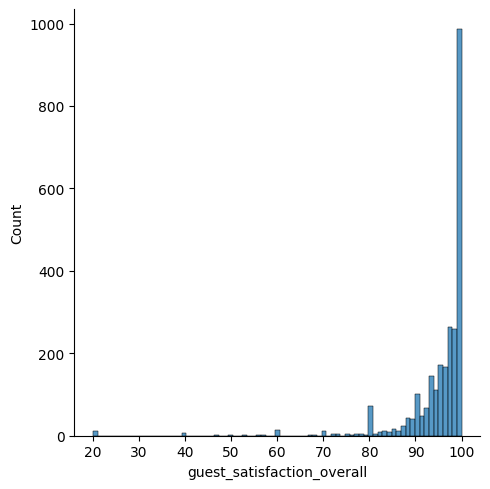

In [8]:
#з використанням бібліотеки seaborn візуалізуємо графік розподілу у вигляді гістограми
sns.displot(data["guest_satisfaction_overall"], kind="hist");

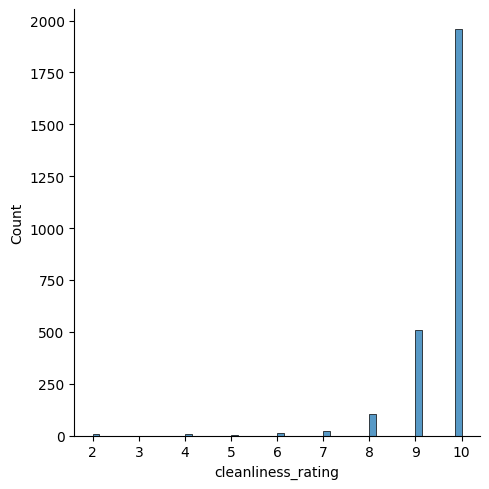

In [9]:
sns.displot(data["cleanliness_rating"], kind='hist');

У випадку показників guest_satisfaction_overall та cleanliness_rating абсолютна більшість значень знаходяять у діапазоні 90-100 та 9-10 відповідно. Це не обов'язково свідчить про повальну високу якість помешкань, скоріше про специфіку таких оцінок від пересічних користувачів. 

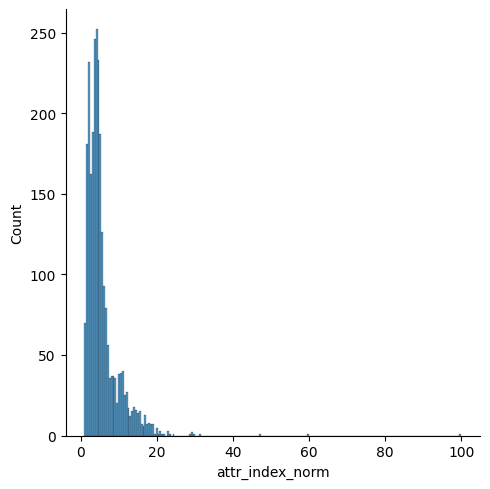

In [10]:
sns.displot(data["attr_index_norm"], kind="hist");

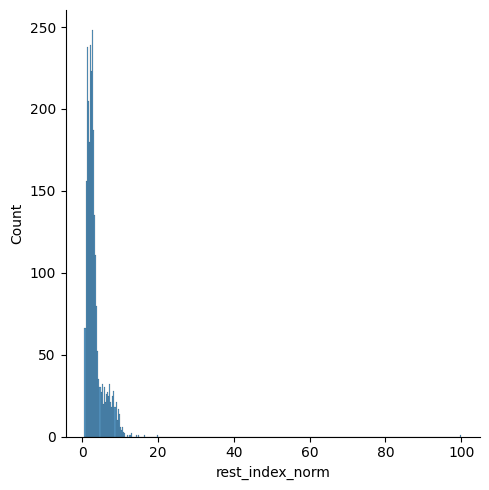

In [11]:
sns.displot(data["rest_index_norm"], kind="hist");

Загалом, висновки для показників attr_index_norm та rest_index_norm, що були зроблені на основі описової статистики, підтвердились

Також подивимось на категоріальні змінні(точніше, одну - room type):

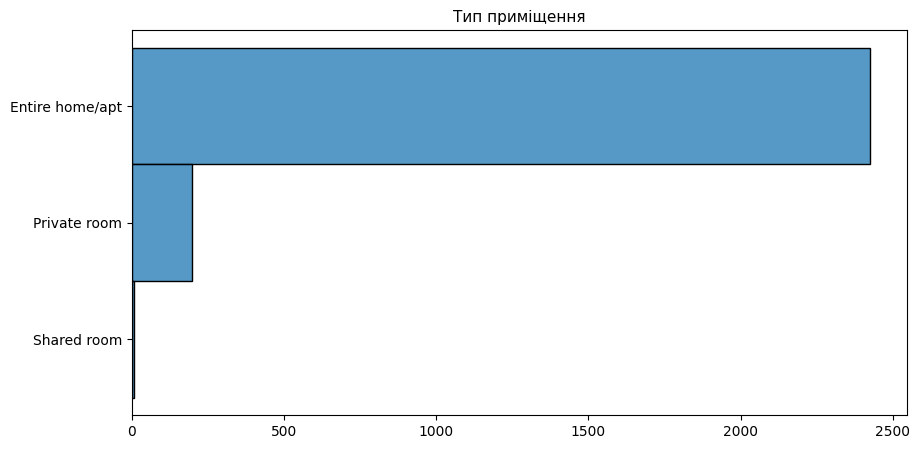

In [12]:
#задаємо розмір діаграми
plt.figure(figsize=(10,5))
#будуємо горизонтальну гістограму за стовпчиком room_type
sns.histplot(data=data, y = "room_type");

#задаємо назву діаграми
plt.title("Тип приміщення", fontsize=11);
#"обнулюємо" підписи на діаграмі
plt.ylabel("");
plt.xlabel("");

Видно, що абсолютна більшість господарів здають в оренду цілі квартири або будинки, покімнатно не здає майже ніхто. Біля 7.6% здають приватні кімнати, спільні ж кімнати здає менше 1% господарів.

## 3. Перекодування категоріальних ознак у числові

In [13]:
#застосовуємо метод get_dummies із параметром drop_first= False, щоб перекодувати стовпчик room_type у числовий вигляд
#drop_first= False потрібний, щоб оригінальний стовпчик не видалявся і щоб ми не втратили ніяких даних
data = pd.get_dummies(data, columns=["room_type"], drop_first= False)
data = data.rename(columns={"room_type_Entire home/apt": "is_entire_home/apt"})
data = data.rename(columns={"room_type_Private room": "is_private_room"})
data = data.rename(columns={"room_type_Shared room": "is_shared_room"})
data

,realSum,person_capacity,host_is_superhost,multi,biz,cleanliness_rating,guest_satisfaction_overall,bedrooms,dist,metro_dist,attr_index_norm,rest_index_norm,lng,lat,is_entire_home/apt,is_private_room,is_shared_room
0,138.963748,4.0,1,1,0,10.0,96.0,1,0.407278,0.304570,9.054205,6.080622,23.73168,37.97776,True,False,False
1,91.627024,4.0,1,1,0,10.0,99.0,1,4.367463,0.297474,1.499687,0.876720,23.72712,38.01435,True,False,False
2,76.629250,2.0,0,0,0,10.0,100.0,1,2.194174,0.385247,2.966519,1.692414,23.73391,37.99529,False,True,False
3,151.852459,4.0,1,0,1,10.0,100.0,2,2.508982,0.563473,2.591282,1.510748,23.73200,37.99800,True,False,False
4,98.657231,2.0,1,1,0,10.0,95.0,1,2.740581,0.725045,2.370037,1.383049,23.73100,38.00000,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2622,74.051508,3.0,1,0,0,10.0,98.0,1,3.311976,1.856865,1.849891,1.062098,23.75000,38.00306,True,False,False
2623,295.737351,4.0,1,0,1,10.0,100.0,1,1.800556,0.571033,5.510019,3.044796,23.71500,37.97400,True,False,False
2624,169.193635,4.0,1,0,1,10.0,99.0,2,3.845100,0.786416,1.592276,0.910205,23.76657,37.99986,True,False,False
2625,160.991728,4.0,1,1,0,10.0,100.0,1,4.827460,0.141952,1.345116,0.786420,23.73300,38.01900,True,False,False


## 4. Створення матриці незалежних змінних і вектору цільово змінної та розподіл датафрейму на тренувальну та тестову вибірки

In [14]:
#розділяємо датафрейм на два. в одному - тільки стовпчик realSum у ролі цільової змінної, у другому - решта стовпчиків у ролі незалежних змінних
X = data.drop("realSum", axis = 1)

Y = data.realSum

In [15]:
#перетворюємо ці два датафрейми у numpy масиви
X_np = np.array(X)
print(X_np.shape)

#масив Y трансофруємо за допомогою методу .reshape, щоб він був двовимірним
Y_np = np.array(Y).reshape(-1,1)
print(Y_np.shape)

(2627, 16)
(2627, 1)


Розподіл вибірки на тренувальну та тестову з часткою тестової 0.25 та random_state=51763:

In [16]:
#розподіл відбувається за дпомогою функції train_test_split, до якої ми передаємо numpy-масиви, які хочемо розділити, співвідношення трнувальної та тестової вибірок та сід для генератора псевдовипадкових чисел
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_np, Y_np, test_size = 0.25, random_state=51763)

## 5. Побудова моделі лінійної регресії

In [17]:
#імпортуємо клас лінійної регресії та інінціалізуємо об'єкт, що буде відповідати за нашу модель
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()

#тренуємо на тренувальній вибірці за допомогою методу .fit
linear_reg.fit(X_train, Y_train);

Можна приступати до оцінки отриманої моделі:

In [18]:
#імпотруємо тести MSE та R^2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score

#записуємо результати прогнозів для тренувальної та тестової вибірок
Y_pred_train = linear_reg.predict(X_train)
Y_pred = linear_reg.predict(X_test)

#виводимо тести R^2 для двох вибірок (за допомогою методу .format)
print('R^2 train: {:.3f}'.format(r2_score(Y_train, Y_pred_train)))
print('R^2 test: {:.3f}'.format(r2_score(Y_test, Y_pred)))

#записуємо результати тестів MSE до змінних
rmse_train = MSE(Y_train,Y_pred_train, squared=False)
rmse_test = MSE(Y_test,Y_pred, squared=False)

#та виводимо ці змінні
print('Root Mean Squared Error train: {:.3f}'.format(rmse_train))
print('Root Mean Squared Error test: {:.3f}'.format(rmse_test))

R^2 train: 0.348
R^2 test: 0.428
Root Mean Squared Error train: 64.260
Root Mean Squared Error test: 60.778


C:\Users\Ilya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Ilya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Коефіцієнти детермінації є досить низькими, до того ж R^2 тестової вибірки є істотно (на 0.08) більшим за R^2 тренувлаьної вибірки, що свідчить про погану навченість моделі.

Що ж на рахунок RMSE, то вона також є нижчою для тестової вибірки, ніж для тренувальної.

## 6. Підбір найкращих параметрів регуляризації та пошук найкращої моделі за допомогою GridSearch

In [19]:
#імпортуємо модуль ElasticNet, що відповідає за лінійну регресію з можливістю використання методів регуляризації
from sklearn.linear_model import ElasticNet
#та GridSearchCV що відповідає за мережевий пошук та крос-валідацію
from sklearn.model_selection import GridSearchCV

#інінціалізуємо об'єкт класу ElasticNet, що буде відповідати за нашу модель
el_net = ElasticNet()

#задаємо параметри alpha та l1_ratio, у яких вказуємо кількість кроків для кожного параметра та розмір цих кроків
en_grid = {'alpha': np.linspace(0,1,101),
          'l1_ratio': np.linspace(0,1,101)}

#інінціалізуємо об'єкт класу GridSearchCV, у конструктор якого передаємо потрібні параметри:
#модель(у нашому випадку el_net), сітку для alpha та l1_ratio, 
#спосіб, за яким оцінюємо якість моделі - у нашому випадку середньоквадратична похибка зі знаком мінус(через специфіку роботи оцінювача, який налаштований на "більше - краще"),
#кількість крос-валідацій(3 у нашому випадку)
#та кількість задіяних ядер(потоків) процесора(у нашому випадку - всі, щоб виконання коду не займало вічність)
grid = GridSearchCV(estimator=el_net,
                      param_grid=en_grid,
                      scoring='neg_mean_squared_error',
                       cv=3,
                       n_jobs=-1) 

In [20]:
#запускаємо навчання моделі GridSearch
grid_result = grid.fit(X_train, Y_train)

#записуємо у змінну та виводимо найкращі параметри регуляризації
model_best = grid_result.best_estimator_
print(model_best)

#та здійснюємо оцінку моделі, що вже була описана вище
Y_pred_best_train = model_best.predict(X_train)
Y_pred_best = model_best.predict(X_test)


print('R^2 train: {:.3f}'.format(r2_score(Y_train, Y_pred_best_train)))
print('R^2 test: {:.3f}'.format(r2_score(Y_test, Y_pred_best)))

rmse_train = MSE(Y_train,Y_pred_best_train, squared=False)
rmse_test = MSE(Y_test,Y_pred_best, squared=False)

print('Root Mean Squared Error train: {:.3f}'.format(rmse_train))
print('Root Mean Squared Error test: {:.3f}'.format(rmse_test))

ElasticNet(alpha=np.float64(1.0), l1_ratio=np.float64(0.0))
R^2 train: 0.304
R^2 test: 0.369
Root Mean Squared Error train: 66.402
Root Mean Squared Error test: 63.846


C:\Users\Ilya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.589e+06, tolerance: 1.248e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ilya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Ilya\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprec

Результати, отримані за **звичайною лінійною регресією** без тюнінгу гіперпараметрів та крос-валідацій:  

ElasticNet(alpha= 1.0, l1_ratio= 0.0)\
R^2 train: 0.348\
R^2 test: 0.428\
Root Mean Squared Error train: 64.260\
Root Mean Squared Error test: 60.778 

Результати, отримані зі **101 кроком для alpha та l1, та з 10-ма крос-валідаціями**:

ElasticNet(alpha= 1.0, l1_ratio= 0.0)\
R^2 train: 0.304\
R^2 test: 0.369\
Root Mean Squared Error train: 66.402\
Root Mean Squared Error test: 63.846

Результати, отримані зі **201 кроком для alpha та l1, та з 10-ма крос-валідаціями**:

ElasticNet(alpha= 1.0, l1_ratio= 0.0)\
R^2 train: 0.304\
R^2 test: 0.369\
Root Mean Squared Error train: 66.402\
Root Mean Squared Error test: 63.846\

Результати, отримані зі **401 кроком для alpha та l1, та з 20-ма крос-валідаціями**:  

ElasticNet(alpha= 1.0, l1_ratio= 0.0)\
R^2 train: 0.304\
R^2 test: 0.369\
Root Mean Squared Error train: 66.402\
Root Mean Squared Error test: 63.846\

По-перше, очевидно, що жоден з варіантів гіперпараметрів, що був підібраний за допомогою GridSearch, не зміг перевершити модель, що була навчена без використання мережевого пошуку. Застосування мережевого пошуку не дало модель, що за якістю була б краща моделі, що була отримана за допомогою методу .fit(), застосованої до звичайного об'єкту моделі лінійної регресії.

In [21]:
#виводимо вільний член нашої моделі(хоч він нам і не знадобиться)
print('intercept (b0):', '\n', linear_reg.intercept_)

#записуємо у новостворену змінну coefs коефіцієнти нашої моделі та індексуємо стовпчиками з того датафрейму, що вийшов після розділення основного датафрейму
coefs = pd.Series(data=linear_reg.coef_[0], index=X.columns)
coefs

intercept (b0): 
 [-7243.38397988]


person_capacity                12.510910
host_is_superhost               1.870377
multi                           6.962202
biz                            29.548023
cleanliness_rating              5.196343
guest_satisfaction_overall      0.439372
bedrooms                       20.795182
dist                          -10.299316
metro_dist                    -18.506508
attr_index_norm                 3.872924
rest_index_norm                 2.946745
lng                           138.333718
lat                           102.782858
is_entire_home/apt             22.835199
is_private_room                12.395432
is_shared_room                -35.230631
dtype: float64

Хоч якість моделі і бажає кращого, проаналізуємо всі коефіцієнти нижче:

Нагадаємо, що медіанна вартість оренди = 127.7 євро

**Типи приміщення:**  
Якщо господар здає в оренду цілу кімнату або будинок, то ціна оренди збільшується на 22.83 євро\
Якщо ж кімната спільна, то ціна зменшується на 35.23 євро\
За окрему приватну кімнату доплата складе 12.39 євро

**Кількість людей:**  
На диво, максимальна кількість людей несильно впливає на ціну - приміщення, що може вмістити на одну людину більше, буде на 12.5 євро дорожче. Хоча медіанний показник за вибіркою - 4 людини, чого може бути цілком достатньо для більшості орендарів. До того ж, цим показником досить просто маніпулювати та завищувати за допомогою тимчасових місць для сну.

**Супервласник:**  
За оренду приміщення у супервласника орендарі доплачують небагато - 1.87 євро  
*Супергосподарі Airbnb - це найрейтинговіші та найдосвідченіші господарі на Airbnb, які прагнуть надати вам неперевершену гостинність. Кожні 3 місяці кожен господар оцінюється на предмет гостинності. Супергосподарі відповідають усім критеріям - вони мають високий рейтинг, досвідчені, надійні та чуйні.* - цитата з сайту Airbnb. На мій розсуд, такий статус господіря має коштувати більше, хоча ми досліджуємо стан ринку, а він диктує свої правила.

Якщо **у власника кілька пропозицій на Airbnb**(тобто, це вже бізнес для власника), то кожна окрема пропозиція піднімається в ціні на 6.96 євро.

За **можливість проведення бізнес зустрічей** у своєму приміщенні, господар може просити на 29.54 євро більше за інших. Досить вигідно.

**Чистота:**  
Враховуючи те, що розподіл є надто нерівномірним(на оцінки 9 та 10 приходиться близько 90% відгуків), досить важко інтерпретувати цей показник.

**Загальне задоволення клієнтів:**
Розподіл цього параметра також дуже сильно зсунутий до максимальних значень, але хоча б більшої точності шкали можна зробити висновок, про те, що різниця у 1 балл важить приблизно 0.44 євро

**Спальні:**
Кожна додаткова спальна кімната с середньому здорожчує помешкання на 20.8 євро

**Відстань до центру міста:**
Кожен додатковий кілометр в середньому зменшує вартість помешкання на 10.3 євро

**Відстань до найближчої станції метро:**
Така ж ситуація простежується і з відстанню до метро - приміщення, що розташоване за 1 км, буде дешевше того, що розташоване прямо біля метро на 18.50 євро.

**Індекс привабливості місцевості:**
додаткові 3.87 євро за кожен бал

**Привабливість закладів харчування:**
додаткові 2.94 євро за кожен бал

**Координати:**
Присутня тенденція до збільшення ціни при збільшенні широти та довготи(при русі на північ та схід відповідно)

Щодо рекомендацій, що можна дати власникам цих приміщень:

З найголовнішого - дуже уважно слідкувати за відгуками орендарів, виправляти прорахунки, люди цінять оголошення з хорошими відгуками. Це ще й може допомогти отримати статус супергосподаря, що також дасть можливість трохи підняти ціну(хоч і незначно). Непогано було б облаштувати приміщення для бізнес-зустрічей - це відкриє ту частину ринку, що була до цього недоступна, а ті, хто огранізовують такі зустрічі, вочевидь, матимуть можливість заплатити більше. І, звичайно, зберігати приміщення у чистоті, це відвідувачі також сильно цінують.

З того, що треба враховувати(особливо для тих, хто купляє приміщення саме для здачі) - краще орієнтуватись на приміщення, що розташоване на сході або на півночі міста, здавати приміщення покімнатно, не заселяти кілька людей у одну кімнату. Також, вочевидь, треба підбирати локації у більш престижних районах, відстані до центра та метро є важливими факторами для збільшення ціни помешкання. Наявність дуже привабливих закладів харчування сильно не вплине на популярність оголошення, цим фактором можна нехтувати на користь більш вигідного розташування. Щодо максимальної кількості людей - також не треба сильно цим перейматись, чотири людини та дві кімнати відповідно буде достатньо.